## Data Preprocessing

#### 1.数据质量问题
#### 较差的数据质量可能会对数据挖掘产生不利影响。常见的数据质量问题包括噪声、异常值、缺失值和重复数据。
#### 数据：breast+cancer+wisconsin+original/breast-cancer-wisconsin.data

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('breast+cancer+wisconsin+original/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
print(data.head())
# 打印数据集实例个数和属性个数
print("实例个数：", data.shape[0])
print("属性个数：", data.shape[1])



   Sample code  Clump Thickness  Uniformity of Cell Size  \
0      1000025                5                        1   
1      1002945                5                        4   
2      1015425                3                        1   
3      1016277                6                        8   
4      1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0           1                3                1        1      2  
1          10                3  

##### 1.1缺失值
##### 缺失值在数据集中编码为“?”，将缺失值转换为NaN，并计算每列数据中缺失值的数量。

In [2]:
data.replace('?', np.nan, inplace=True)
missing_values_count = data.isnull().sum()
print("每列的缺失值数量：\n", missing_values_count)


每列的缺失值数量：
 Sample code                     0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [3]:
# 创建副本以便不影响原始数据集
data_for_median = data.copy()

# 先将'Bare Nuclei'字段转换为数值型
data_for_median['Bare Nuclei'] = pd.to_numeric(data_for_median['Bare Nuclei'], errors='coerce')

# 将缺失值替换为该列的中值
for column in data_for_median.columns:
    if data_for_median[column].dtype == 'object':
        continue
    if data_for_median[column].isnull().sum() > 0:
        median_value = data_for_median[column].median()
        data_for_median[column] = data_for_median[column].fillna(median_value)

# 在data_for_median副本上查看'Bare Nuclei'列的数据类型
print(data_for_median['Bare Nuclei'].dtype)

# 在data_for_median副本上再次检查是否还有缺失值
missing_values_count_after_filling = data_for_median.isnull().sum()
print("在data_for_median副本上填充缺失值后的缺失值统计：\n", missing_values_count_after_filling)


float64
在data_for_median副本上填充缺失值后的缺失值统计：
 Sample code                    0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [4]:
# 丢弃包含缺失值的数据点，并打印丢弃后数据集的数据量
data_dropped = data.copy()
before_drop = data_dropped.shape[0]
data_dropped.dropna(inplace=True)
after_drop = data_dropped.shape[0]

# 打印丢弃后的数据集大小
print("丢弃缺失值前的数据量：", before_drop)
print("丢弃缺失值后的数据量：", after_drop)

丢弃缺失值前的数据量： 699
丢弃缺失值后的数据量： 683


##### 1.2异常值
##### 通过绘制boxplot来识别数据中包含异常值的列
##### 由于“Bare Nuclei”列中的值存储为字符串对象，应该先将该列转换为数值

float64


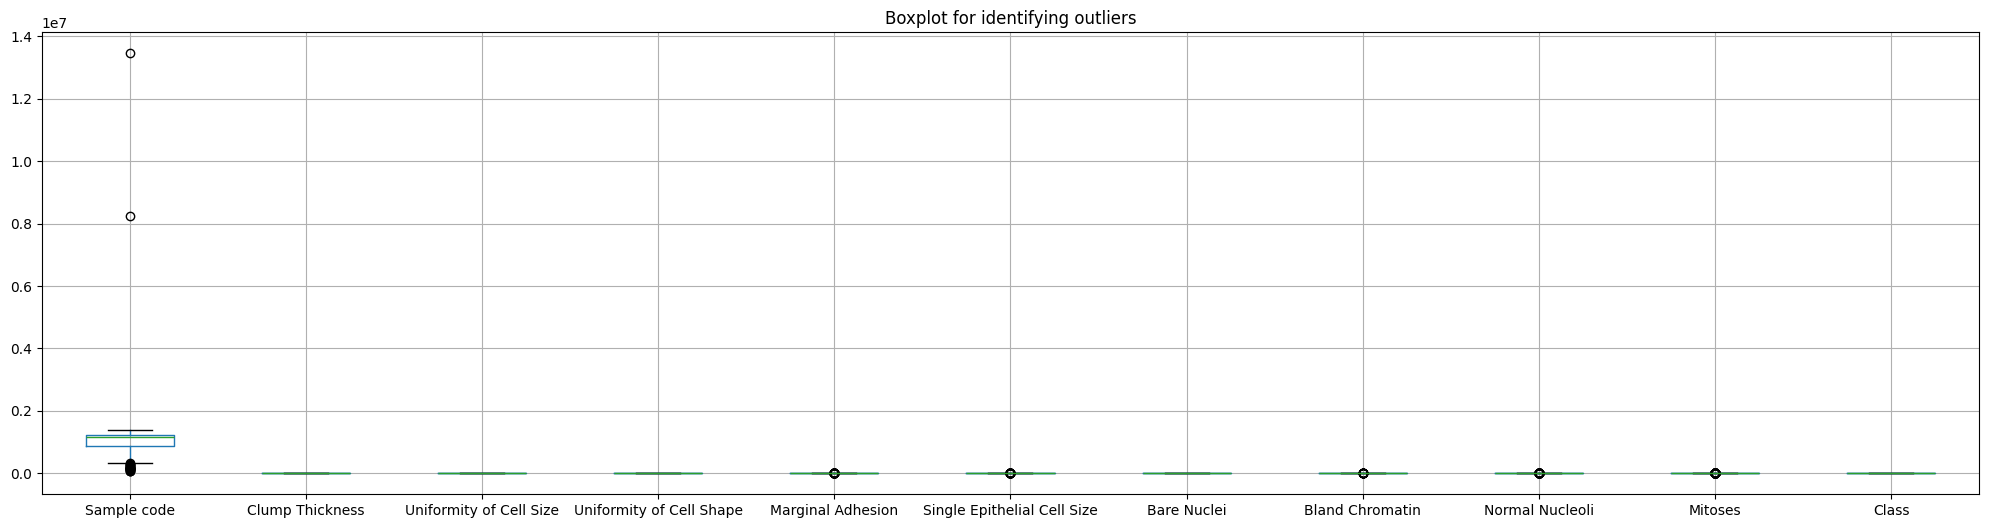

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# 将Bare Nuclei属性的值转换为数值，利用boxplot绘制箱线图
data_outlier = data.copy()
data_outlier['Bare Nuclei'] = pd.to_numeric(data_outlier['Bare Nuclei'], errors='coerce')
print(data_outlier['Bare Nuclei'].dtype)
plt.figure(figsize=(25, 6))
data_outlier.boxplot()
plt.title('Boxplot for identifying outliers')
plt.show()

##### 为了丢弃异常值，我们可以计算每个属性的Z分数，并删除那些包含Z分数异常高或异常低的属性的实例（例如，如果Z>3或Z<=-3）。

In [6]:
# 数据标准化，计算Z分数
from scipy.stats import zscore
mean = data_outlier.mean()
std = data_outlier.std()

# 然后，计算 Z 分数
z_scores_manual = (data_outlier - mean) / std

In [7]:
# 按照“Z > 3 or Z <= -3”这个原则删除异常值，打印原始数据量和删除异常值后的数据量
threshold = 3
mask = (z_scores_manual > threshold) | (z_scores_manual <= -threshold)
number_of_outlier_rows = mask.any(axis=1).sum()
print("被标记为异常的样本数: ", number_of_outlier_rows)
data_clean = data_outlier[~(mask.any(axis=1))]
original_count = data_outlier.shape[0]
cleaned_count = data_clean.shape[0]
print("原始数据量：", original_count)
print("删除异常值后的数据量：", cleaned_count)

被标记为异常的样本数:  53
原始数据量： 699
删除异常值后的数据量： 646


##### 1.3重复数据

In [8]:
# 检查数据中的重复样本，打印重复样本个数
data_same = data.copy()
print("重复样本个数：", data_same.duplicated().sum())

重复样本个数： 8


In [9]:
# 删除重复行，打印删除前后数据集样本量
before_drop = data_same.shape[0]
data_same.drop_duplicates(inplace=True)
after_drop = data_same.shape[0]

print("删除重复行前数据量：", before_drop)
print("删除重复行后数据量：", after_drop)




删除重复行前数据量： 699
删除重复行后数据量： 691


#### 2.数据聚合
#### 目的：(1)减小要处理的数据的大小;(2)改变分析的粒度(从细粒度到粗粒度);(3)提高数据的稳定性
#### 数据：DTW_prec.csv


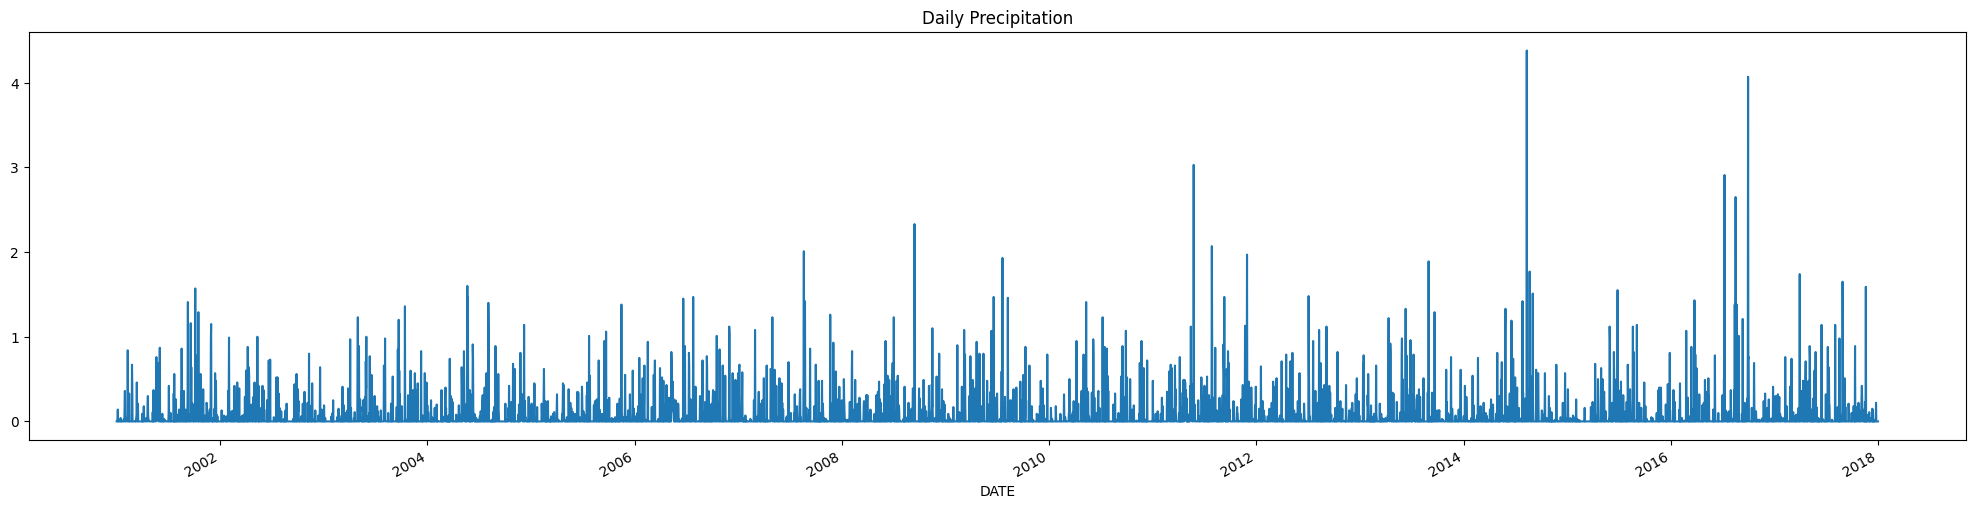

每日降水量的方差： 0.05304985960911706


In [10]:
# 绘制其每日时间序列的折线图，并打印数据的方差
df = pd.read_csv('DTW_prec.csv')
# 将 'DATE' 列转换为日期时间格式，并设置为索引
fig, ax = plt.subplots(figsize=(25, 6))
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
df.set_index('DATE', inplace=True)
df['PRCP'].plot(title='Daily Precipitation')
plt.show()
print("每日降水量的方差：", df['PRCP'].var())

DATE
1     23.01
2     25.39
3     34.38
4     43.48
5     63.57
6     46.40
7     53.16
8     56.14
9     52.17
10    34.59
11    39.80
12    30.60
Name: PRCP, dtype: float64


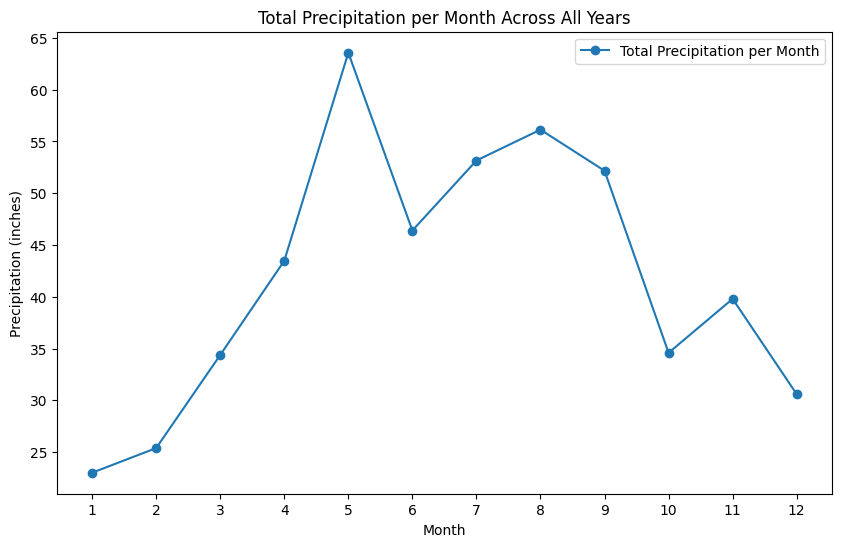

数据的方差： 163.5337356060606


In [11]:
# 每日降水量的时间序列过于混乱，不同时间步长之间的变化很大。将其按月分组和聚合，获得月总降水量值。
# 绘制其每月时间序列的折线图，并打印数据的方差
# 将数据按月聚合，并计算每月总降水量
import matplotlib.dates as mdates
# 对DataFrame的索引（DATE列）的月份进行分组，并计算每个月份的总降水量
monthly_precip_grouped = df['PRCP'].groupby(df.index.month).sum()

# 打印每个月份的总降水量
print(monthly_precip_grouped)
# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制每个月份总降水量的折线图
ax.plot(monthly_precip_grouped.index, monthly_precip_grouped.values, marker='o', label='Total Precipitation per Month')

# 设置 x 轴的标签
ax.set_xticks(range(1, 13))  # 设置从1到12的月份
#ax.set_xticklabels([pd.to_datetime(str(month)).strftime('%b') for month in range(1, 13)])  # 显示月份名称

# 设置图表标题和轴标签
ax.set_title('Total Precipitation per Month Across All Years')
ax.set_xlabel('Month')
ax.set_ylabel('Precipitation (inches)')

# 显示图例
ax.legend()

# 显示图表
plt.show()

# 计算并打印数据的方差
variance = monthly_precip_grouped.var()
print("数据的方差：", variance)

DATE
2001-12-31    30.04
2002-12-31    23.67
2003-12-31    26.69
2004-12-31    29.15
2005-12-31    23.07
2006-12-31    35.23
2007-12-31    27.95
2008-12-31    30.57
2009-12-31    31.12
2010-12-31    27.21
2011-12-31    41.47
2012-12-31    24.46
2013-12-31    29.64
2014-12-31    31.74
2015-12-31    24.49
2016-12-31    36.75
2017-12-31    29.44
Freq: YE-DEC, Name: PRCP, dtype: float64


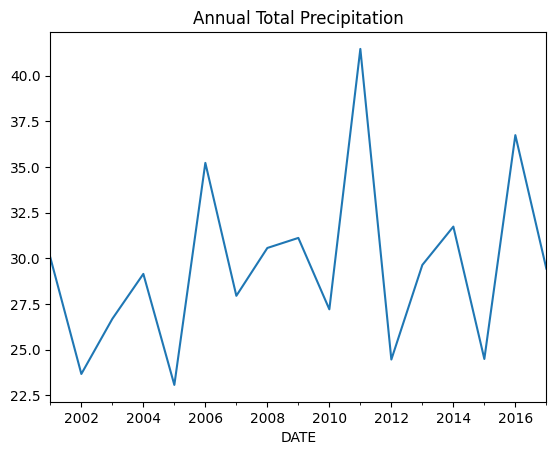

每年降水量的方差： 23.699712499999997


In [12]:
# 绘制其每年时间序列的折线图，并打印数据的方差

# 将数据按年聚合，并计算每年总降水量
annual_precip = df['PRCP'].resample('YE').sum()
print(annual_precip)
# 绘制每年降水量的时间序列折线图，并打印方差
annual_precip.plot(title='Annual Total Precipitation')
plt.show()
print("每年降水量的方差：", annual_precip.var())



#### 3.采样(可分为替换采样和不替换采样)
#### 不替换采样，其中每个选定实例都从数据集中删除；替换采样，每个选定实例不删除，从而允许在样本中多次选择
#### 数据：breast+cancer+wisconsin+original/breast-cancer-wisconsin.data

In [13]:
import pandas as pd
# 从原始数据中随机选择（不替换）大小为3的样本
df = pd.read_csv('breast+cancer+wisconsin+original/breast-cancer-wisconsin.data', header=None)
sample_without_replacement = df.sample(n=3, replace=False)
print("不替换采样的3个样本:")
print(sample_without_replacement)

不替换采样的3个样本:
          0   1   2   3   4   5   6   7   8   9   10
145  1184840   1   1   3   1   2   ?   2   1   1   2
205  1218105   5  10  10   9   6  10   7  10   5   4
433  1293439   3   2   2   3   2   1   1   1   1   2


In [14]:
# 随机选择1%的数据（不替换）并显示所选样本
sample_one_percent_without_replacement = df.sample(frac=0.01, replace=False)
print("不替换采样的1%的样本:")
print(sample_one_percent_without_replacement)

不替换采样的1%的样本:
          0   1   2   3   4   5  6   7   8   9   10
131  1179818   2   1   1   1   2  1   3   1   1   2
119  1173681   3   2   1   1   2  2   3   1   1   2
480  1301945   5   1   1   1   1  1   1   1   1   2
524   749653   3   1   1   1   2  1   2   1   1   2
439   566509   5   1   1   1   2  1   1   1   1   2
497  1182404   4   2   1   1   2  1   1   1   1   2
86   1148278   3   3   6   4   5  8   4   4   1   4


In [15]:
# （替换）采样1%的数据
sample_one_percent_with_replacement = df.sample(frac=0.01, replace=True)
print("替换采样的1%的样本:")
print(sample_one_percent_with_replacement)

替换采样的1%的样本:
          0   1   2   3   4   5   6   7   8   9   10
47   1105524   1   1   1   1   2   1   2   1   1   2
222  1226012   4   1   1   3   1   5   2   1   1   4
479  1299161   4   8   7  10   4  10   7   5   1   4
385  1071084   3   3   2   2   3   1   1   2   3   2
674  1355260   1   1   1   1   2   1   2   1   1   2
552  1299924   3   2   2   2   2   1   4   2   1   2
197  1213383   5   1   1   4   2   1   3   1   1   2


#### 4.离散化（将连续属性转换为分类属性）
#### 数据：breast+cancer+wisconsin+original/breast-cancer-wisconsin.data
#### 对乳腺癌症数据集中的“Clump Thickness”属性使用无监督离散方法（equal width和equal depth）

In [16]:
# 使用Counter对数据集Clump Thickness属性的取值进行计数
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 加载数据集
df = pd.read_csv('breast+cancer+wisconsin+original/breast-cancer-wisconsin.data', header=None)

# “Clump Thickness”是第二列（即索引为1）
clump_thickness = df[1]

# 使用Counter对“Clump Thickness”属性的取值进行计数
counts = Counter(clump_thickness)
print("“Clump Thickness”属性的取值计数:")
print(counts)

“Clump Thickness”属性的取值计数:
Counter({1: 145, 5: 130, 3: 108, 4: 80, 10: 69, 2: 50, 8: 46, 6: 34, 7: 23, 9: 14})


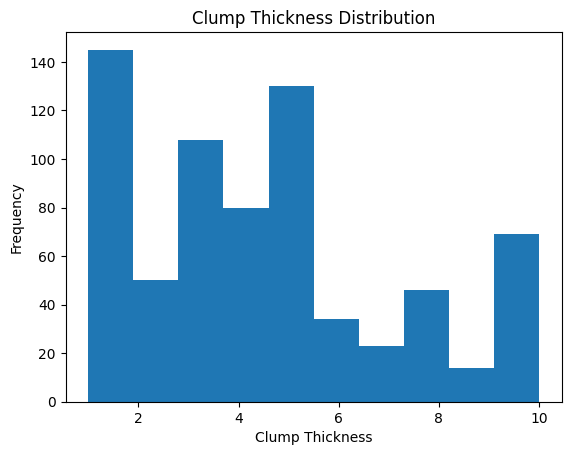

In [17]:
# 绘制直方图，显示属性值的分布
# 绘制直方图
plt.hist(clump_thickness, bins=10) # bins可以根据数据的分布调整
plt.title('Clump Thickness Distribution')
plt.xlabel('Clump Thickness')
plt.ylabel('Frequency')
plt.show()

In [18]:
# equal width：应用cut()将属性离散为4个间隔宽度相似的bin
# 使用value_counts()确定每个bin中的实例数
# Equal width bins
clump_thickness_equal_width = pd.cut(clump_thickness, bins=4)
equal_width_counts = clump_thickness_equal_width.value_counts()
print("Equal width bins的实例数:")
print(equal_width_counts)

Equal width bins的实例数:
1
(0.991, 3.25]    303
(3.25, 5.5]      210
(7.75, 10.0]     129
(5.5, 7.75]       57
Name: count, dtype: int64


In [19]:
# equal width：应用cut()将属性离散为4个间隔宽度相似的bin
# 使用value_counts()确定每个bin中的实例数
# Equal width bins
clump_thickness_equal_width = pd.cut(clump_thickness, bins=4, precision=2)
equal_width_counts = clump_thickness_equal_width.value_counts()
print("Equal width bins的实例数:")
print(equal_width_counts)

Equal width bins的实例数:
1
(0.99, 3.25]    303
(3.25, 5.5]     210
(7.75, 10.0]    129
(5.5, 7.75]      57
Name: count, dtype: int64


In [20]:
# equal frequency：qcut()函数可用于将值划分为4个bin，以便每个bin具有几乎相同数量的实例
# Equal frequency bins
clump_thickness_equal_freq = pd.qcut(clump_thickness, q=4)
equal_freq_counts = clump_thickness_equal_freq.value_counts()
print("Equal frequency bins的实例数:")
print(equal_freq_counts)

Equal frequency bins的实例数:
1
(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: count, dtype: int64


#### 5.主成分分析（PCA）
#### PCA是一种通过将数据从其原始高维空间投影到低维空间来减少数据中属性数量的经典方法
#### PCA创建的新属性具有以下特点：(1)它们是原始属性的线性组合;(2)它们彼此正交（垂直）;(3)它们捕获数据中的最大变化量
#### 数据：pics文件夹下包含16个RGB图像文件，每个文件的大小为111×111像素

In [21]:
# 读取图像数据，将RGB图像转换为111x111x3=36963个特征值，最终得到一个16x36963的矩阵
# 读取图像数据并将其转换为特征值矩阵

from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

# 读取图像数据并将其转换为特征值矩阵
image_folder = './pics'  # 更新为实际的文件夹路径
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.jpg')])
image_data = []
labels = []

# 根据文件名分配类别标签
categories = ['burger', 'drink', 'pasta', 'chicken']

# 对文件名进行排序，确保顺序是正确的
image_files.sort(key=lambda x: int(x.replace('Picture', '').replace('.jpg', '')))

for file_name in image_files:
    category_index = (int(file_name.replace('Picture', '').replace('.jpg', '')) - 1) // 4
    with Image.open(os.path.join(image_folder, file_name)) as img:
        img = img.resize((111, 111))  # 确保图像是111x111像素
        pixels = np.array(img).flatten()  # 将图像数据转换为一维数组
        image_data.append(pixels)
        labels.append(categories[category_index])  # 分配类别

In [22]:
# 将图像数据列表转换为numpy数组
image_data_np = np.array(image_data)

# 打印数组的shape属性以确认其维度
print("矩阵的维度:", image_data_np.shape)

# 确认每张图片转换后的特征值数量
feature_count = 111 * 111 * 3  # 对于RGB图像，每个像素包含3个颜色通道
print("每张图片的特征值数量:", feature_count)

# 确认矩阵大小
if image_data_np.shape[1] == feature_count:
    print("确认：每张图像转换后的特征值数量正确。")
else:
    print("特征值数量不匹配。")

if image_data_np.shape == (16, feature_count):
    print("确认：矩阵大小为16x36963。")
else:
    print("矩阵大小不匹配。")


矩阵的维度: (16, 36963)
每张图片的特征值数量: 36963
确认：每张图像转换后的特征值数量正确。
确认：矩阵大小为16x36963。


In [23]:
# 使用PCA，将数据矩阵投影到其前两个主成分
# 无需编写PCA代码，直接导入sklearn.decomposition中的PCA类
# 转换为numpy数组并进行PCA分析
image_matrix = np.array(image_data)
pca = PCA(n_components=2)  # 我们只关心前两个主成分
projected = pca.fit_transform(image_matrix)



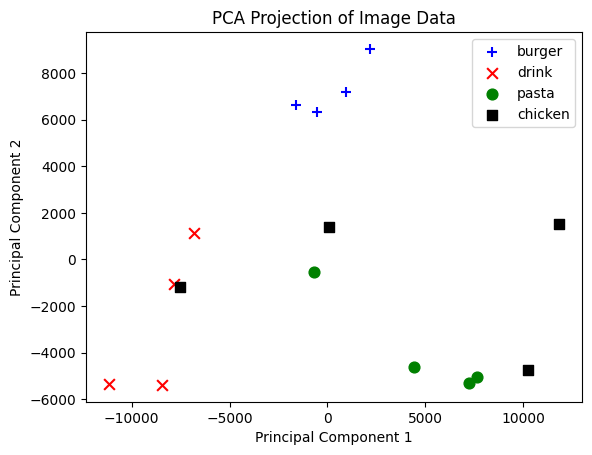

In [24]:
# 根据类别分配颜色和标记
colors = {'burger': 'b', 'drink': 'r', 'pasta': 'g', 'chicken': 'k'}
markers = {'burger': '+', 'drink': 'x', 'pasta': 'o', 'chicken': 's'}

# 绘制散点图来显示投影值
for category in categories:
    # 获取当前类别的投影点
    cat_projected = projected[np.array(labels) == category]
    plt.scatter(cat_projected[:, 0], cat_projected[:, 1], color=colors[category],
                marker=markers[category], label=category, s=60)

plt.title('PCA Projection of Image Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()